# 1 - Recommendation system

In this notebook, we focus on proposing a recipe recommendation system based on food.com provided data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

tqdm.pandas()

In [2]:
# import of data
interactions_test = pd.read_csv("./data/interactions_test.csv")
interactions_train = pd.read_csv("./data/interactions_train.csv")
raw_interactions = pd.read_csv("./data/RAW_interactions.csv")
raw_recipes = pd.read_csv("./data/raw_recipes.csv")

In [3]:
display(interactions_test)
display(interactions_train)
display(raw_interactions)
display(raw_recipes)

,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935
...,...,...,...,...,...,...
12450,101053,179011,2009-01-03,5.0,25054,130258
12451,252205,81398,2005-12-26,2.0,25055,152255
12452,624305,142984,2011-01-15,1.0,25057,139864
12453,173575,104842,2004-12-18,3.0,25059,140646


,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723
...,...,...,...,...,...,...
698896,926904,457971,2018-12-18,5.0,13681,141067
698897,2002312797,27208,2018-12-18,5.0,14897,99787
698898,1290903,131607,2018-12-18,5.0,11605,76163
698899,226867,363072,2018-12-18,5.0,3604,29101


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


## 1.1 - By popularity

We propose here a recommendation system based on recipe popularity. First, we define a dataframe called `metadata` which contains average rating and number of vote for each recipe.

In [4]:
# group by recipe id and get mean and counts of ratings
metadata = raw_interactions.groupby('recipe_id')['rating'].agg(['mean', 'count']).reset_index()

# rename columns
metadata.columns = ['recipe_id', 'rating_average', 'rating_count']

# add recipe name for each recipe id
metadata = metadata.merge(raw_recipes[['id', 'name']], left_on="recipe_id", right_on="id")

display(metadata[['name', 'recipe_id', 'rating_average', 'rating_count']].rename(columns={"name": "recipe_name"}))

,recipe_name,recipe_id,rating_average,rating_count
0,low fat berry blue frozen dessert,38,4.250000,4
1,biryani,39,3.000000,1
2,best lemonade,40,4.333333,9
3,carina s tofu vegetable kebabs,41,4.500000,2
4,best blackbottom pie,43,1.000000,1
...,...,...,...,...
231632,bailey s chocotini,537459,5.000000,1
231633,5 ingredient salted caramel crumble bars,537485,5.000000,1
231634,moist gingerbread cake,537543,0.000000,1
231635,nutcracker peppermint red velvet cake pops,537671,0.000000,1


### 1.1.1 - Best recipes by average note

We can simply first recommend recipes with the best rating average.

In [5]:
display(metadata.sort_values('rating_average', ascending=False).head()[['name', 'rating_average', 'rating_count']])

,name,rating_average,rating_count
231636,mini buffalo chicken cheesesteaks,5.0,1
93721,plum crazy sauce,5.0,1
186335,creme d argenteuil au crabe asparagus soup w ...,5.0,1
93759,coconut pie,5.0,1
186336,tomates farcies d oeuf egg stuffed tomato w h...,5.0,4


The recommended recipes have indeed high rating average, but have low rating count.

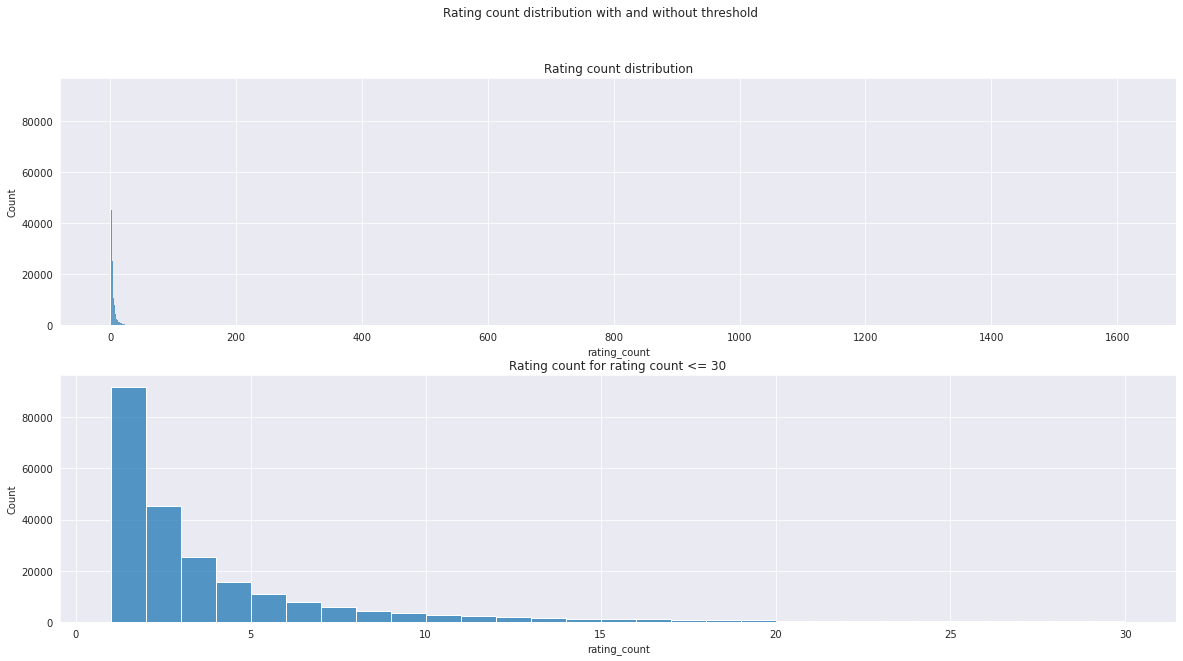

In [6]:
plt.figure(figsize=(20, 10))
plt.suptitle("Rating count distribution with and without threshold")
plt.subplot(2, 1, 1)
sns.histplot(metadata, x="rating_count", binwidth=1)
plt.title('Rating count distribution')
plt.subplot(2, 1, 2)
rating_count_threshold = 30
sns.histplot(metadata.loc[metadata['rating_count'] <= rating_count_threshold], x="rating_count", binwidth=1)
plt.title(f'Rating count for rating count <= {rating_count_threshold}')
plt.show()

A lot of users rate only a few recipes. Thus, we can consider best rating average for recipes with enough rating count.

In [7]:
display(metadata.loc[metadata['rating_count'] >= rating_count_threshold].sort_values("rating_average",
                                                                                     ascending=False).head()[
            ['name', 'rating_average', 'rating_count']])

,name,rating_average,rating_count
31283,caprese salad tomatoes italian marinated toma...,5.0,52
71024,kittencal s soft white baguette style bread,5.0,36
35845,linda s special potato salad,5.0,32
94966,kittencal s caesar tortellini salad,5.0,36
12915,berry cream cheese coffee cake,5.0,37


### 1.1.2 - Best recipes by IMDb score



We propose now a recommendation system based on IMDb score adapted to recipe. The IMDb score is defined as follows:
IMDb$_{score}$ = $\frac{v}{v+m} \times R + \frac{m}{v+m} \times C$

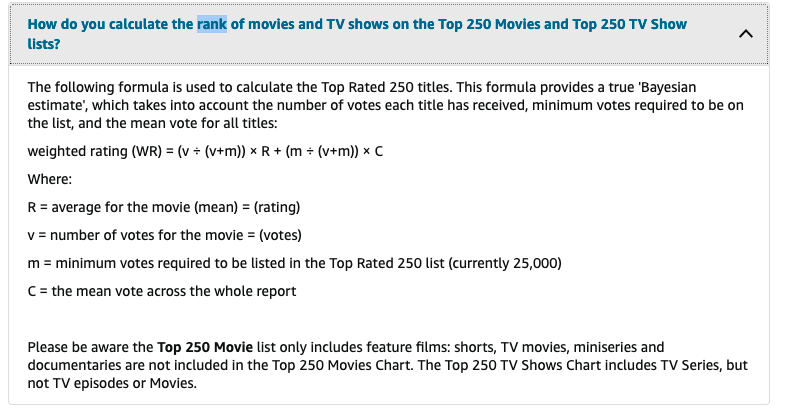


In [8]:
# minimum votes required to be listed in the Top Rated 250 list (for IMDb)
m = rating_count_threshold

# mean rating accros the whole dataset
c = metadata.rating_average.mean()


def imdb_score(dataframe_row):
    """
    Calculate the IMDB score for each recipe.
    :param dataframe_row: row of metadata dataframe.
    :return: IMDB score.
    """
    v = dataframe_row['rating_count']
    r = dataframe_row['rating_average']
    return (v / (v + m) * r) + (m / (m + v) * c)


metadata['imdb_score'] = metadata.progress_apply(imdb_score, axis=1)
best_recipes = metadata.sort_values('imdb_score', ascending=False)[
    ['name', 'rating_count', 'rating_average', 'imdb_score']]

display(best_recipes.head())

100%|██████████| 231637/231637 [00:01<00:00, 185774.42it/s]


,name,rating_count,rating_average,imdb_score
224586,mexican stack up rsc,217,4.990783,4.912500
23999,brown sugar bundt cake,118,4.915254,4.799915
36416,mango salsa 1,74,4.959459,4.782571
53087,monterey chicken rolls,134,4.865672,4.770655
221515,company s coming mashed potatoes,97,4.896907,4.766830


The proposed recipes have good rating average without need of rating count threshold.

## 1.2 - By recipe steps

First, we define a dataframe containing information on each recipe, to which we add the previous imdb score. We also concatenate the steps. Because of the size of the dataset, we only keep recipes with a certain number of rating count, and we drop the recipes with missing values.

In [9]:
import numpy as np

rating_count_threshold = 20

# add rating_count and imdb_score to raw_recipes and drop nan values
recipes = raw_recipes.merge(metadata[['recipe_id', 'imdb_score', 'rating_count']], left_on="id", right_on="recipe_id")

# drop nan values and recipes with low rating count
recipes = recipes.loc[recipes['rating_count'] > rating_count_threshold].dropna()

# reorganize columns
recipes = recipes[['recipe_id', 'name', 'steps', 'description', 'imdb_score']].reset_index(drop=True)

# concatenate steps
recipes['steps'] = recipes['steps'].progress_apply(lambda steps: ' '.join(eval(steps)))

# we redefine recipe_id
recipes['recipe_id'] = np.arange(len(recipes))

display(recipes)

100%|██████████| 7309/7309 [00:00<00:00, 59021.14it/s]


,recipe_id,name,steps,description,imdb_score
0,0,chile rellenos,drain green chiles sprinkle cornstarch on shee...,a favorite from a local restaurant no longer i...,4.218988
1,1,how i got my family to eat spinach spinach ca...,preheat oven to 350 degrees place spinach in s...,"if spinach scares you, this is one recipe that...",4.191520
2,2,immoral sandwich filling loose meat,"brown the meat & drain fat stir in sugar , mus...",just the thing for a day when you're wanton so...,4.203674
3,3,land of nod cinnamon buns,"before you turn in for the night , grease a 10...",i have made this several times and it's dead e...,4.473918
4,4,never weep whipped cream,whip all ingredients together until firm peaks...,"i don't know where i got this, but it works. t...",4.721703
...,...,...,...,...,...
7304,7304,zucchini salsa canned,"day one:in a large bowl combine zucchini , oni...","this recipe is from a friend's, daughter's mot...",4.189249
7305,7305,zucchini they will eat,fry bacon until crisp and drain on paper towel...,"quick and easy- hot and cheesy! seasonings, ba...",4.607043
7306,7306,zucchini pepper relish,"in a food processor , finely chop zucchini , u...",too much zucchini? try this wonderful relish a...,4.603604
7307,7307,zuppa toscana soup olive garden clone,bring chicken stock and water to a light boil ...,i have tried quite a few different recipes tha...,4.441271


We can now define a tokenizer performing stemming that will be used on recipe steps or description.

In [10]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
# Download stopwords list

stop_words = set(stopwords.words('english'))

# Interface lemma tokenizer from nltk with sklearn
class StemTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`']
    def __init__(self):
        self.stemmer = SnowballStemmer('english')
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) if t not in self.ignore_tokens]

tokenizer=StemTokenizer()

[nltk_data] Downloading package punkt to /home/dylan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dylan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Here is an example of what is done during tokenization / stemming.

In [11]:
sentence = "We are running a course titled 'AI Frameworks' at ENSEEIHT, Toulouse, France."

# initial sentence
print(f'Initial sentence: {sentence}\n\n')

# tokenization
tokens = word_tokenize(sentence)
print(f'Tokens: {tokens}\n\n')

# remove punctuation
tokens_no_punct = [t for t in tokens if t not in tokenizer.ignore_tokens]
print(f'Tokens without punctuation: {tokens_no_punct}\n\n')

# stemming
stemmed_tokens = tokenizer(sentence)
print(f'Stemmed tokens: {stemmed_tokens}\n\n')

# remove stop words (done when computation of TF-IDF matrix)
result = [t for t in stemmed_tokens if t not in stop_words]
print(f'Without stop words: {result}')

Initial sentence: We are running a course titled 'AI Frameworks' at ENSEEIHT, Toulouse, France.


Tokens: ['We', 'are', 'running', 'a', 'course', 'titled', "'AI", 'Frameworks', "'", 'at', 'ENSEEIHT', ',', 'Toulouse', ',', 'France', '.']


Tokens without punctuation: ['We', 'are', 'running', 'a', 'course', 'titled', "'AI", 'Frameworks', "'", 'at', 'ENSEEIHT', 'Toulouse', 'France']


Stemmed tokens: ['we', 'are', 'run', 'a', 'cours', 'titl', 'ai', 'framework', "'", 'at', 'enseeiht', 'toulous', 'franc']


Without stop words: ['run', 'cours', 'titl', 'ai', 'framework', "'", 'enseeiht', 'toulous', 'franc']


We now define a function which returns the TF-IDF matrix:
* Each row represent a recipe steps / description
* Each column represent a token obtained with the previous tokenization process
* Each value represent the TF-IDF value, computed according to the following formula : 

TF_IDF$_{token,\;document,\;corpus} = \underbrace{|\{token\;\in\;document\}|}_{\text{Term Frequency (TF)}} \times \underbrace{\log{}\left(\frac{|C|}{|\{document\;\in\;corpus,\;s.t.\;token\;\in\;document\}|}\right)}_{\text{Inverse Document Frequency (IDF)}}$

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

def series_to_tfid_matrix(series: pd.Series, max_features: int = 4000):

    # lemmatize the stop words
    token_stop = tokenizer(' '.join(stop_words))
    tfidf = TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, max_features=max_features)
    return tfidf.fit_transform(series)

We can now define a function giving recommendations for a similarity matrix. 

Here, the similarity matrix is defined as follows: 
- each row / column corresponds to a document (recipe steps or description)
- each cell corresponds to a distance measure (cosine distance) between the vectors of the two documents (row / column) given in the TF-IDF matrix

In this way, the similarity matrix measures the distance between two documents. To make a recommendation for a document, simply find the documents with the highest similarities to it in the similarity matrix.

In [13]:
def recommend(recipe_id, similarity_matrix):
    print(f"Recipe id : {recipe_id} | Recipe name : {recipes.loc[recipe_id]['name']}\n")
    print(f"Recipe steps : {recipes.loc[recipe_id]['steps']}\n")
    print(f"Recipe description : {recipes.loc[recipe_id]['description']}\n")

    recommendations = similarity_matrix[recipe_id].argsort()[1:6]
    return recipes.loc[recipes['recipe_id'].isin(recommendations)]

In [14]:
from sklearn.metrics.pairwise import cosine_distances

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = series_to_tfid_matrix(recipes['steps'], max_features=4000)

cosine_sim = cosine_distances(tfidf_matrix, tfidf_matrix)

recommandation = recommend(10, cosine_sim)
display(recommandation)

/home/dylan/miniconda3/envs/projet_ia_framework/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Recipe id : 10 | Recipe name : wacky cake

Recipe steps : sift together and make 3 holes in dry ingredients in first hole , pour vegetable oil in second hole , pour vinegar in third hole , pour vanilla pour cold water over all mix well with fork or whisk , but do not beat bake in greased 8 x 8 pan for about 35 minutes at 350 deg f

Recipe description : this is mom's favorite chocolate cake. easy to make and has a little different twist. also has no eggs or dairy products. pick your favorite frosting for the top--mom likes 7-minute the best.



,recipe_id,name,steps,description,imdb_score
393,393,bacon and egg cups,preheat oven to 350 degrees pre- cook bacon fo...,this is a simple recipe that my husband makes ...,4.004667
425,425,bacon egg and cheese hashkets sp5,pre-heat oven to 350 degrees heat small skille...,official contest entry: simply potatoes 5fix. ...,4.562677
788,788,best orange creamsicle cake,bake cake as needed in 9x13-inch pan when bake...,this is by far one of the best cake recipes. ...,4.321989
2236,2236,cupcake brownies ww,"preheat oven to 350 in a bowl , stir together ...",these brownies were pretty good for anyone wat...,4.258068
4128,4128,linda s cheesecake stuffed strawberries,"place cream cheese in a bowl , and microwave f...",omg.. these are like heaven in your mouth! ta...,4.753959


For this chocolate cake recipe, the first two recommendations are bacon dishes, which seems a long way from the original recipe. The other recommendations are sweet ones, quite similar to the original recipe.

In [15]:
print(f"Recipe '{recipes.loc[10]['name']}' steps : {recipes.loc[10]['steps']}\n")
print(f"First recommendation '{recommandation.iloc[0]['name']}' steps : {recommandation.iloc[0]['steps']}\n")
print(f"Second recommendation '{recommandation.iloc[1]['name']}' steps : {recommandation.iloc[1]['steps']}\n")

Recipe 'wacky cake' steps : sift together and make 3 holes in dry ingredients in first hole , pour vegetable oil in second hole , pour vinegar in third hole , pour vanilla pour cold water over all mix well with fork or whisk , but do not beat bake in greased 8 x 8 pan for about 35 minutes at 350 deg f

First recommendation 'bacon and egg cups' steps : preheat oven to 350 degrees pre- cook bacon for 5-10 minutes using a muffin / cupcake pan , line the holes with a slice of bacon , pressing the bacon around the sides of the hole , not on the bottom crack one egg into each hole sprinkle with salt and pepper and cheese if desired bake at 350 degrees for 20 minutes or until the egg is the doneness you like these bacon and egg cups should pop right out of the pan

Second recommendation 'bacon  egg and cheese hashkets  sp5' steps : pre-heat oven to 350 degrees heat small skillet on medium-high temperature while skillet is heating up , slice bacon in half lengthwise and then dice into medium s

We can see that the redundancy of the word "hole" may have skewed the similarity between the recipes.

In [21]:
recommandation = recommend(122, cosine_sim)
display(recommandation)

Recipe id : 122 | Recipe name : absolutely the best gluten free peanut butter cookies

Recipe steps : preheat oven to 375 make sure you have beaters that can handle thick batter in a medium bowl , cream margarine and sugars beat in egg and peanut butter in a separate bowl , mix flours and baking soda evenly add in two parts to wet ingredients , beating on med-high speed until thoroughly blended roll dough into 1-inch balls , and place 2 inches apart onto ungreased baking sheet you can press them with a fork if desired , but not necessary bake 8-10 minutes let cool 5 minutes before removing from baking sheet

Recipe description : not just for the celiacs! i was skeptical, since the last recipe i tried was gritty, heavy and nasty.  these are light, rich and absolutely perfect.  i actually like these better than "regular" peanut butter cookies, and from a big fat momma, that's saying something!  adapted from catherine's recipe.



,recipe_id,name,steps,description,imdb_score
2541,2541,easy peanut butter chocolate chip cookies,mix together the first four ingredients until ...,these are a very easy cookie and don't take a ...,4.427991
3166,3166,grilled chicken satay,"in saucepan cook peanut butter , water , soy s...",toss aside your peanut butter and jelly sandwi...,4.257450
3334,3334,healthy peanut butter banana oatmeal cookies,preheat oven to 350 mash bananas with a fork a...,tasty little cookies with no added fat or suga...,4.060489
4501,4501,moist chewy irresistible peanut butter cookies,preheat oven to 350 degrees combine peanut but...,this is a very good peanut butter cookie.,4.535611
5191,5191,perfect peanut butter cookies,preheat oven to 375f have ungreased shiny cook...,when peanut butter cookies are requested in my...,4.427928


For this peanut butter cookie recipe, the first recommendations also have peanut butter, but aren't necessarily sweet. Sorting by a sweet/savory variable could potentially yield even better recommendations.

## 1.3 - By recipe description

We can now apply the same process to the recipe description, and see if the two first recommendations are still proposed.

In [16]:
tfidf_matrix = series_to_tfid_matrix(recipes['description'], max_features=4000)
cosine_sim = cosine_distances(tfidf_matrix, tfidf_matrix)
recommandation = recommend(10, cosine_sim)
display(recommandation)

/home/dylan/miniconda3/envs/projet_ia_framework/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Recipe id : 10 | Recipe name : wacky cake

Recipe steps : sift together and make 3 holes in dry ingredients in first hole , pour vegetable oil in second hole , pour vinegar in third hole , pour vanilla pour cold water over all mix well with fork or whisk , but do not beat bake in greased 8 x 8 pan for about 35 minutes at 350 deg f

Recipe description : this is mom's favorite chocolate cake. easy to make and has a little different twist. also has no eggs or dairy products. pick your favorite frosting for the top--mom likes 7-minute the best.



,recipe_id,name,steps,description,imdb_score
4537,4537,mom s hot chocolate mix,mix all together store in airtight container u...,my mom's favorite hot chocolate mix. a little ...,4.515080
4620,4620,my favorite baked beans,"cook bacon till crisp remove bacon , reserving...",here ya go. this is my favorite recipe. my mom...,4.430527
4699,4699,no bake chocolate cookies,bring first 4 ingredients to a boil cook for 1...,these are my husband's favorite cookies. my mo...,4.577577
5116,5116,peanut butter blossoms,"combine shortening , sugars , egg , vanilla an...",my mom made these cookies all the time when i ...,4.593193
5614,5614,rhubarb crisp,"combine rhubarb , sugar , flour and cinnamon a...",mom's recipe! easy to make and easy to eat.,4.276626


In [17]:
print(f"Recipe '{recipes.loc[10]['name']}' steps : {recipes.loc[10]['description']}\n")
print(f"First recommendation '{recommandation.iloc[0]['name']}' description : {recommandation.iloc[0]['steps']}\n")
print(f"Second recommendation '{recommandation.iloc[1]['name']}' description : {recommandation.iloc[1]['steps']}\n")

Recipe 'wacky cake' steps : this is mom's favorite chocolate cake. easy to make and has a little different twist. also has no eggs or dairy products. pick your favorite frosting for the top--mom likes 7-minute the best.

First recommendation 'mom s hot chocolate mix' description : mix all together store in airtight container use 1 / 3 mix to 2 / 3 water when making hot chocolate

Second recommendation 'my favorite baked beans' description : cook bacon till crisp remove bacon , reserving about 3 tbsp drippings in skillet drain and crumble bacon set aside cook chopped onion in reserved drippings till tender stir in two cans pork and beans in tomato sauce , brown sugar , catsup , worcestershire sauce , and prepared mustard turn into a 1 1 / 2 quart casserole bake , uncovered , in a 350 degree oven for 1 1 / 2 to 1 3 / 4 hours , or cook in the microwave oven on hi for 10 to 12 minutes stir 1 / 2 way through cooking time , top with bacon let stand a few minutes before serving - - - - - - - 

The results are not necessarily more relevant. We note the presence of "my favorite baked beans" as the second recommendation for example. Looking at the descriptions, we note the redundancy of the word "mom".

In [23]:
recommandation = recommend(122, cosine_sim)
display(recommandation)

Recipe id : 153 | Recipe name : almond joy fudge brownies

Recipe steps : prepare mix according to brownie package directions , except only use 3 tablespoons of vegetable oil pour into a greased 9 x 13" pan pour and spread 1 cup of condensed milk sprinkle with chopped candy bars and toasted almonds bake at 350 for 35-38 minutes let cool completely before cutting into 2 dozen bars

Recipe description : almond joy fudge brownies    these are wonderful and simple.



,recipe_id,name,steps,description,imdb_score
2404,2404,easiest chocolate peanut butter fudge,"mix sugar , cocoa and milk in a saucepan bring...","this tastes like the old-fashioned, watched ov...",4.346188
3512,3512,hot fudge sauce microwave,"in a microwave proof bowl , combine margarine ...",to die for hot fudge sauce!,4.148324
3765,3765,kahlua fudge,line 8-inch square baking pan with foil in 2-q...,this is a wonderful tasting fudge. prep time d...,4.207043
4529,4529,mom s cocoa powder brownies,combine all ingredients and mix well bake at 3...,"oooey, gooey, rich and chewy. if you are a fa...",4.157014
6833,6833,triple fudge brownies,prepare pudding according to package direction...,"this is the brownies for dummies version, so s...",4.492529


We see the same thing with the descriptions: the dishes on offer contain the term "peanut butter", so we get recommendations that aren't necessarily relevant in terms of sweet and savory.

Nevertheless, we expect the recommendations by steps to be more relevant than the recommendations by description, because, when reading the descriptions, we find a lot of additional colloquial language that doesn't provide any information about the recipe itself ("family recipe", etc.).